In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('messi.jpg')

## Accessing Image Properties

In [3]:
px = img[100,100]

In [4]:
px

array([71, 50, 29], dtype=uint8)

In [5]:
blue = img[100,100,0]

In [6]:
blue

71

In [7]:
px[0]

71

In [8]:
img.item(100,100,2)

29

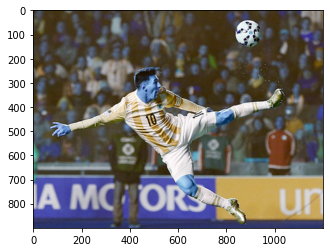

In [9]:
from matplotlib import pyplot as plt
# img = cv2.imread('messi.jpg',0)
plt.imshow(img, cmap = 'gray')#, interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([]) 
#to hide tick values on X and Y axis
plt.show()

## Image ROI

In [ ]:
ball = img[30:160,820:960]

In [ ]:
plt.imshow(ball, cmap = 'gray')#, interpolation = 'bicubic')
plt.show()

In [ ]:
img[600:730,820:960] = ball

In [ ]:
plt.imshow(img, cmap = 'gray')#, interpolation = 'bicubic')
plt.show()

## Splitting and Merging Image Channels

The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels
can be merged back together to form a BGR image again.

In [ ]:
b,g,r = cv2.split(img)

In [ ]:
img

In [ ]:
img.shape

In [ ]:
b

In [ ]:
b.shape

In [ ]:
g

In [ ]:
g.shape

In [ ]:
r

In [ ]:
r.shape

In [ ]:
r.dtype

## Merging Image Channels

In [ ]:
img = cv2.merge((b,g,r))

In [ ]:
img.shape

In [ ]:
img

Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. You can
simply use Numpy indexing which is faster.

In [ ]:
img[:,:,2] = 0

In [ ]:
img

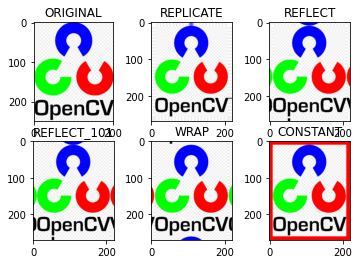

In [10]:
BLUE = [255,0,0]
img1 = cv2.imread('images/opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

## Bitwise Operations

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of
the image, defining and working with non-rectangular ROI etc. 
Below we will see an example on how to change a particular region of an image.

In [11]:
# Load two images
img1 = cv2.imread('messi.jpg')
img2 = cv2.imread('images/opencv_logo.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

In [13]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

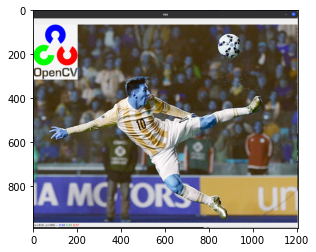

In [15]:
plt.imshow(cv2.imread('images/outp.png'))#, interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([]) 
#to hide tick values on X and Y axis
plt.show()